In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
#     torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])

params = [encoder.parameters(), target.parameters(), transitions.parameters()]
optimizer = torch.optim.Adam(params=itertools.chain(*params), lr=1e-4)

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/400 [00:00<?, ?it/s]

On batch number 1/100 and on k = 1 we have for  0: 0.5660000268835574 and for +1: 0.43400002061389387
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -42371852.0
Saved samples to ./pics/mnist_epoch_0_K_5_N_1_amortize_True.png


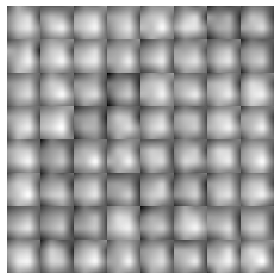

  0%|          | 1/400 [00:50<5:38:10, 50.85s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.1000214329292417
Autoregression coeff 0.49848493933677673
On batch number 1/100 and on k = 2 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.1000214329292417
Autoregression coeff 0.49848493933677673
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.1000214329292417
Autoregression coeff 0.49848493933677673
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.1000214329292417
Autoregression coeff 0.49848493933677673
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.1000214329292417
Autoregression coeff 0.49848493933677673
Current epoch: 2 	 Current ELBO: -161225981952.0
Saved samples to ./pics/mnist_epoch_1_K_5_N_1_amortize_True.png


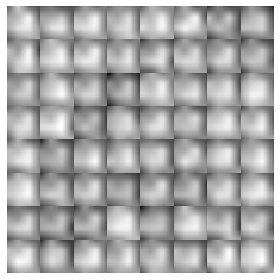

  0%|          | 2/400 [01:41<5:37:53, 50.94s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10026582858956899
Autoregression coeff 0.49877408146858215
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.10026582858956899
Autoregression coeff 0.49877408146858215
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10026582858956899
Autoregression coeff 0.49877408146858215
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10026582858956899
Autoregression coeff 0.49877408146858215
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10026582858956899
Autoregression coeff 0.49877408146858215
Current epoch: 3 	 Current ELBO: -18488559140864.0
Saved samples to ./pics/mnist_epoch_2_K_5_N_1_amortize_True.png


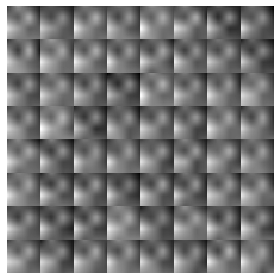

  1%|          | 3/400 [02:34<5:40:54, 51.52s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10059048416686205
Autoregression coeff 0.49957048892974854
On batch number 1/100 and on k = 2 we have for  0: 0.7260000344831496 and for +1: 0.27400001301430166
Stepsize 0.10059048416686205
Autoregression coeff 0.49957048892974854
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10059048416686205
Autoregression coeff 0.49957048892974854
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10059048416686205
Autoregression coeff 0.49957048892974854
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10059048416686205
Autoregression coeff 0.49957048892974854
Current epoch: 4 	 Current ELBO: -483123724812288.0
Saved samples to ./pics/mnist_epoch_3_K_5_N_1_amortize_True.png


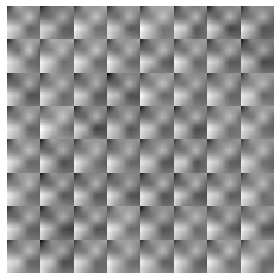

  1%|          | 4/400 [03:26<5:39:29, 51.44s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10035838454757276
Autoregression coeff 0.4989713728427887
On batch number 1/100 and on k = 2 we have for  0: 0.5600000265985727 and for +1: 0.4400000208988786
Stepsize 0.10035838454757276
Autoregression coeff 0.4989713728427887
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10035838454757276
Autoregression coeff 0.4989713728427887
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10035838454757276
Autoregression coeff 0.4989713728427887
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10035838454757276
Autoregression coeff 0.4989713728427887
Current epoch: 5 	 Current ELBO: -5759066349502464.0
Saved samples to ./pics/mnist_epoch_4_K_5_N_1_amortize_True.png


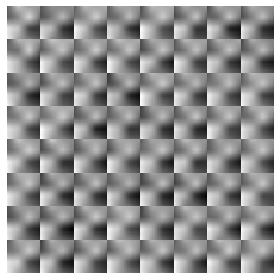

  1%|▏         | 5/400 [04:17<5:37:53, 51.33s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.390000018524006 and for +1: 0.6100000289734453
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 6 	 Current ELBO: -4.24096924916777e+16
Saved samples to ./pics/mnist_epoch_5_K_5_N_1_amortize_True.png


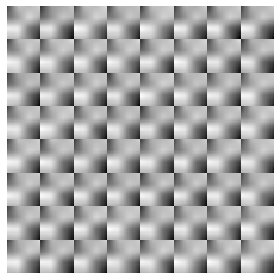

  2%|▏         | 6/400 [05:08<5:36:30, 51.25s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.35000001662410796 and for +1: 0.6500000308733433
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 7 	 Current ELBO: -2.302858384900096e+17
Saved samples to ./pics/mnist_epoch_6_K_5_N_1_amortize_True.png


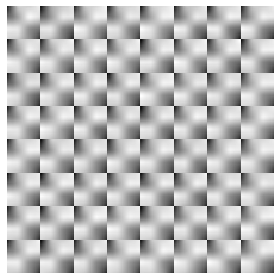

  2%|▏         | 7/400 [05:59<5:35:17, 51.19s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3920000186190009 and for +1: 0.6080000288784504
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 8 	 Current ELBO: -9.208410569818767e+17
Saved samples to ./pics/mnist_epoch_7_K_5_N_1_amortize_True.png


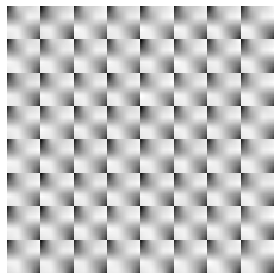

  2%|▏         | 8/400 [06:50<5:34:10, 51.15s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.34800001652911305 and for +1: 0.6520000309683383
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 9 	 Current ELBO: -3.0909212494806385e+18
Saved samples to ./pics/mnist_epoch_8_K_5_N_1_amortize_True.png


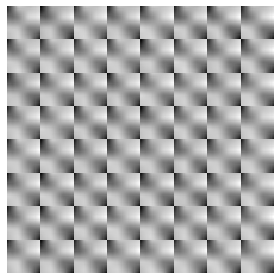

  2%|▏         | 9/400 [07:41<5:33:10, 51.13s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3740000177640468 and for +1: 0.6260000297334045
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 10 	 Current ELBO: -8.920545643844338e+18
Saved samples to ./pics/mnist_epoch_9_K_5_N_1_amortize_True.png


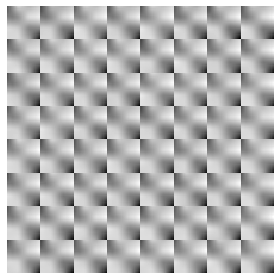

  2%|▎         | 10/400 [08:32<5:32:11, 51.11s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3660000173840672 and for +1: 0.6340000301133841
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 11 	 Current ELBO: -2.3509638877850632e+19
Saved samples to ./pics/mnist_epoch_10_K_5_N_1_amortize_True.png


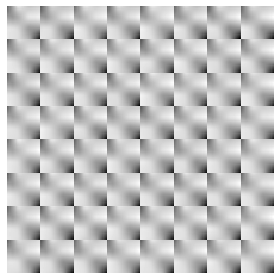

  3%|▎         | 11/400 [09:23<5:31:18, 51.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3680000174790621 and for +1: 0.6320000300183892
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 12 	 Current ELBO: -5.158613448604097e+19
Saved samples to ./pics/mnist_epoch_11_K_5_N_1_amortize_True.png


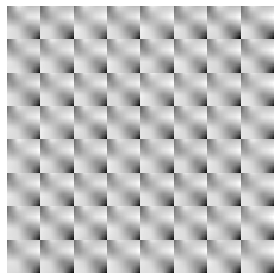

  3%|▎         | 12/400 [10:14<5:30:22, 51.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3740000177640468 and for +1: 0.6260000297334045
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 13 	 Current ELBO: -9.807070214496872e+19
Saved samples to ./pics/mnist_epoch_12_K_5_N_1_amortize_True.png


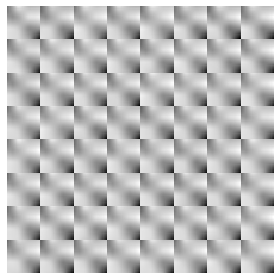

  3%|▎         | 13/400 [11:05<5:29:28, 51.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.3640000172890723 and for +1: 0.636000030208379
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 14 	 Current ELBO: -1.690535543530712e+20
Saved samples to ./pics/mnist_epoch_13_K_5_N_1_amortize_True.png


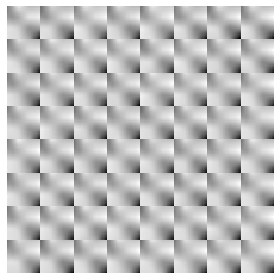

  4%|▎         | 14/400 [11:56<5:28:36, 51.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 2 we have for  0: 0.35400001681409776 and for +1: 0.6460000306833535
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 3 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 4 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
On batch number 1/100 and on k = 5 we have for  0: 0.0 and for +1: 1.0000000474974513
Stepsize 0.10009309488028806
Autoregression coeff 0.4982004761695862
Current epoch: 15 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_14_K_5_N_1_amortize_True.png


/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=Fa

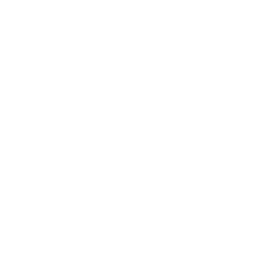

  4%|▍         | 15/400 [12:47<5:27:42, 51.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
Current epoch: 16 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_15_K_5_N_1_amortize_True.png


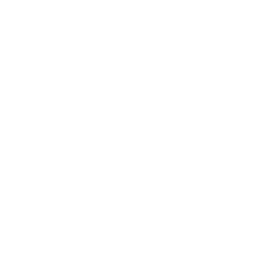

  4%|▍         | 16/400 [13:38<5:26:46, 51.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
Current epoch: 17 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_16_K_5_N_1_amortize_True.png


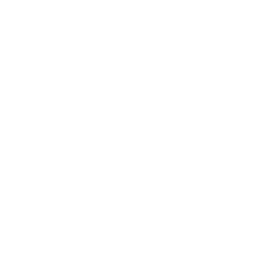

  4%|▍         | 17/400 [14:29<5:25:53, 51.05s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
Current epoch: 18 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_17_K_5_N_1_amortize_True.png


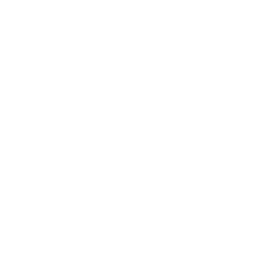

  4%|▍         | 18/400 [15:20<5:25:01, 51.05s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
Current epoch: 19 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_18_K_5_N_1_amortize_True.png


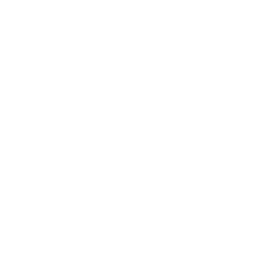

  5%|▍         | 19/400 [16:12<5:24:11, 51.05s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
Current epoch: 20 	 Current ELBO: nan
Saved samples to ./pics/mnist_epoch_19_K_5_N_1_amortize_True.png


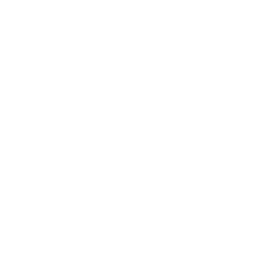

  5%|▌         | 20/400 [17:03<5:23:19, 51.05s/it]

On batch number 1/100 and on k = 1 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 2 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 3 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 4 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan
On batch number 1/100 and on k = 5 we have for  0: 1.0000000474974513 and for +1: 0.0
Stepsize nan
Autoregression coeff nan


KeyboardInterrupt: 

In [8]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z, p, u, p_old, x, current_log_alphas, log_jac, sum_log_sigma):
    log_p = target.get_logdensity(z=z, x=x) + args.std_normal.log_prob(p).sum(1)
    log_r = -args.K * torch_log_2
    log_m = args.std_normal.log_prob(u).sum(1) - sum_log_sigma + args.std_normal.log_prob(p_old).sum(1) - log_jac + current_log_alphas
    elbo_full = log_p + log_r - log_m
    current_grad = torch.mean(log_p + (current_log_alphas + args.std_normal.log_prob(u).sum(1) - sum_log_sigma) * (elbo_full.detach() - 1.))
    return elbo_full, current_grad
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches
        
        cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        
        sum_grad = 0.
        z = z.detach()
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z.detach(), x=batch_train,
                                                    p_old=p.detach(), k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z.detach(), x=batch_train,
                                                                    p_old=p.detach(), k=cond_vectors[k], target_distr=target) # sample a_i -- directions

            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))

            elbo_full, current_grad = compute_loss(z=z, p=p, u=u, p_old=p_old,
                                        x=batch_train, current_log_alphas=current_log_alphas, log_jac=log_jac, sum_log_sigma=sum_log_sigma)
            sum_grad += current_grad

        (-sum_grad).backward()
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)